<a href="https://www.kaggle.com/code/ibrahimawad02/mobile-price-prediction?scriptVersionId=141281631" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mobile price prediction using different models

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv', sep = ',', encoding = 'utf-8')
df.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1132,1524,1,1.8,1,0,0,10,0.6,174,4,...,154,550,2678,16,5,13,1,0,1,2
51,1760,0,1.4,1,5,0,63,0.8,127,8,...,1382,1383,2053,19,12,16,0,1,0,2
363,879,0,1.5,1,0,1,21,0.8,187,4,...,463,1038,2927,14,13,11,1,0,1,2
1591,1830,0,0.5,0,0,0,7,0.9,191,6,...,460,1583,2334,8,7,14,0,1,0,2
906,1983,1,1.2,1,6,1,27,0.6,125,1,...,370,1197,3897,12,10,10,1,1,1,3


In [3]:
df.drop_duplicates()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: >

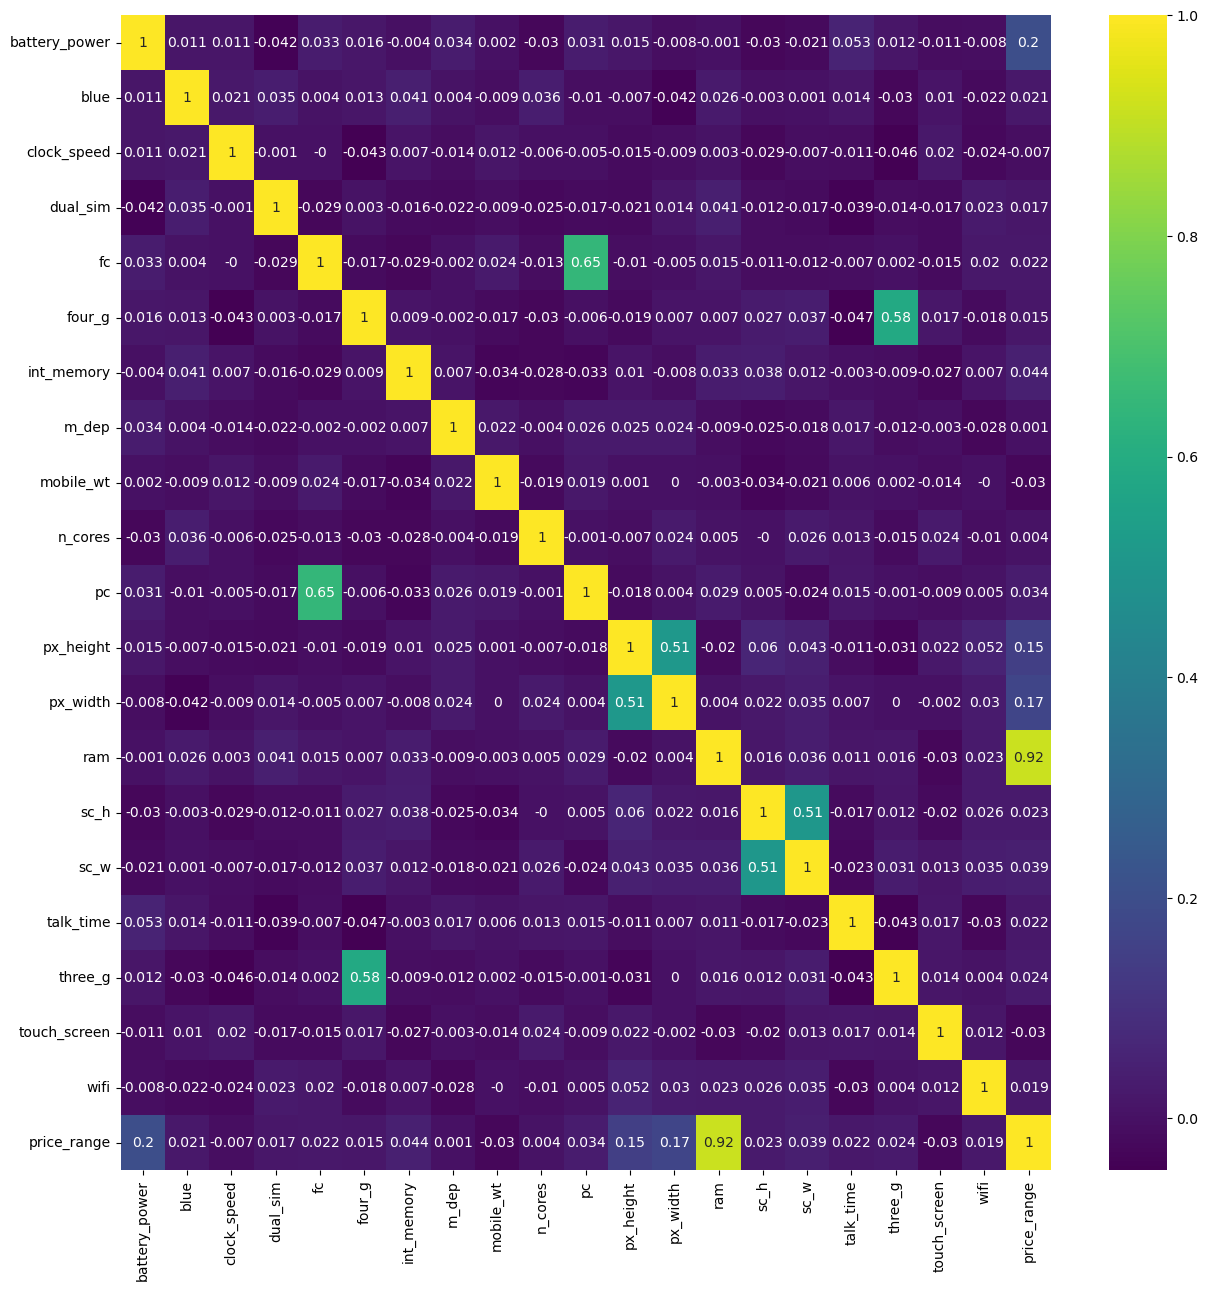

In [7]:
plt.figure(figsize=(15, 15))
sns.heatmap(round(df.corr(), 3), annot = True, cmap = 'viridis')

# Preprocessing

In [8]:
SC = StandardScaler()

In [9]:
x = df.drop('price_range', axis = 1)
y = df['price_range']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 11)

In [11]:
x_train = SC.fit_transform(x_train)
x_test = SC.fit_transform(x_test)

# Modelling

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model1 = RandomForestClassifier(n_estimators = 40, max_depth = 3, max_features = 21)

In [14]:
model1.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, max_features=21, n_estimators=40)

In [15]:
print(model1.score(x_train, y_train))
model1.score(x_test, y_test)

0.7746666666666666


0.786

***

In [16]:
model2 = RandomForestClassifier(n_estimators = 60, max_depth = 5, max_features = 21)

In [17]:
model2.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=21, n_estimators=60)

In [18]:
print(model2.score(x_train, y_train))
model2.score(x_test, y_test)

0.9133333333333333


0.868

<Axes: >

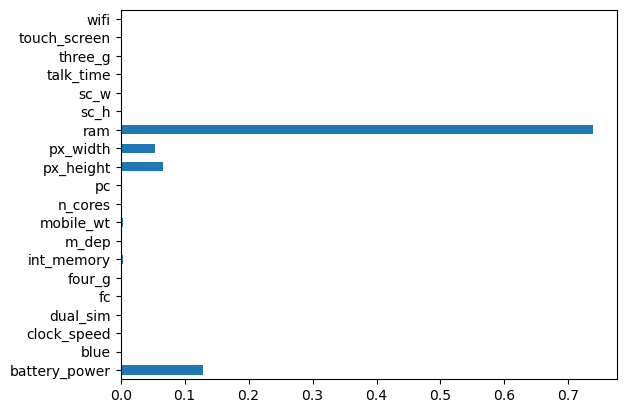

In [19]:
(pd.Series(model2.feature_importances_, index = x.columns).plot(kind = 'barh'))

***
## Decision tree modelling

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model3 = DecisionTreeClassifier(max_depth = 3, max_features = 16)

In [22]:
model3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=16)

In [23]:
model3.score(x_train, y_train)

0.7

In [24]:
model3.score(x_test, y_test)

0.696

***

In [25]:
model4 = DecisionTreeClassifier(max_depth = 6, max_features = 20)

In [26]:
model4.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=20)

In [27]:
print(model4.score(x_train, y_train))
model4.score(x_test, y_test)

0.9326666666666666


0.864

<Axes: >

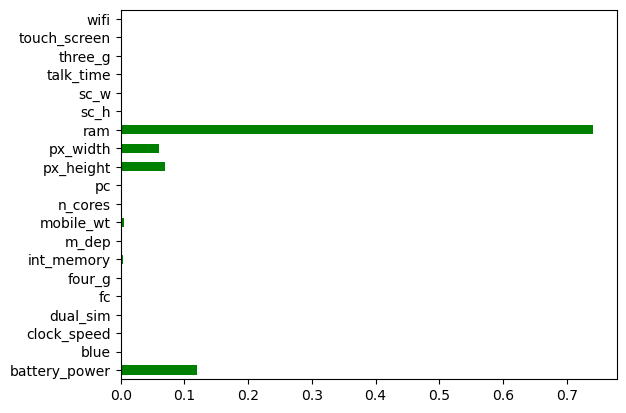

In [28]:
(pd.Series(model4.feature_importances_, index = x.columns).plot(kind = 'barh', color = 'green'))

# Thanks for reading